In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
np.random.seed(50)

We start by creating 2 fake time series, we'll use them for our cointegration and stationarity analysis:

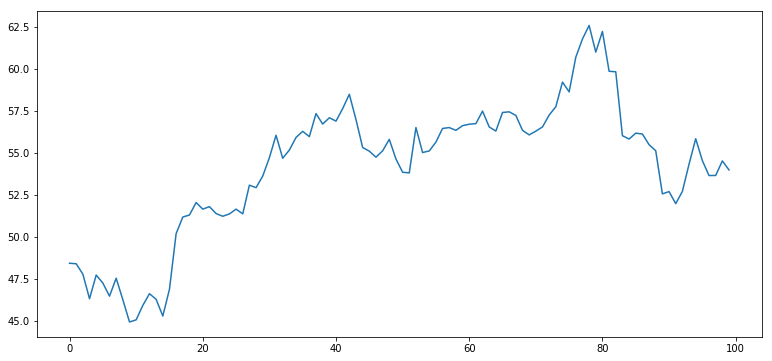

In [42]:
stock_1 = pd.Series(np.cumsum(np.random.normal(0, 1, 100)), name='Stock 1') + 50
stock_1.plot(figsize=(13, 6))

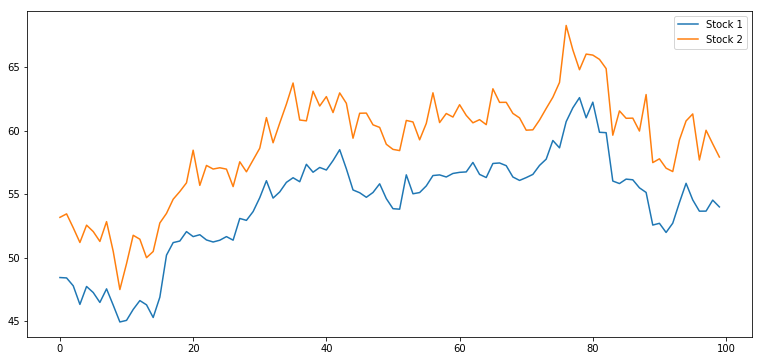

In [43]:
stock_2 = stock_1 + 5 + np.random.normal(0, 1, 100)  # Shift it and add a little bit of noise
stock_2.name = 'Stock 2'
pd.concat([stock_1, stock_2], axis=1).plot(figsize=(13, 6))

### Correlation

The first simple measurement of "similarity" between two time series, is just the correlation that exists between them. These two processes have been generated from the same seed ("Stock 1"), so they'll be correlated. Correlation is simple to calculate:

In [44]:
stock_1.corr(stock_2)

0.9706999499876596

Both processes are highly correlated, which is expected as they're fake.

### Cointegration

Cointegration is a more profound and useful statistical property ([more](https://www.blackwellglobal.com/correlation-vs-cointegration/)). To measure cointegration, we'll use the [`statsmodels`](http://www.statsmodels.org/) package. We'll use the [`tsa`](http://www.statsmodels.org/stable/tsa.html) subpackage, that's intended for Time Series Analysis.

In [45]:
from statsmodels.tsa.stattools import coint

In [46]:
score, pvalue, _ = coint(stock_1, stock_2)

`coint`'s Null hypothesis is that there is NO cointegration. The alternative hypothesis is that there is cointegration. We can choose a confidence value to test our hypothesis. Let's say that, if the pvalue is below 0.05 we can **reject** the null hypothesis:

In [47]:
"{:.15f}".format(pvalue)

'0.000000000000065'

The obtained value is WAY below 0.05, so we can reject the Null Hypothesis and assume that both time series are co-integrated. This is how cointegration looks like:

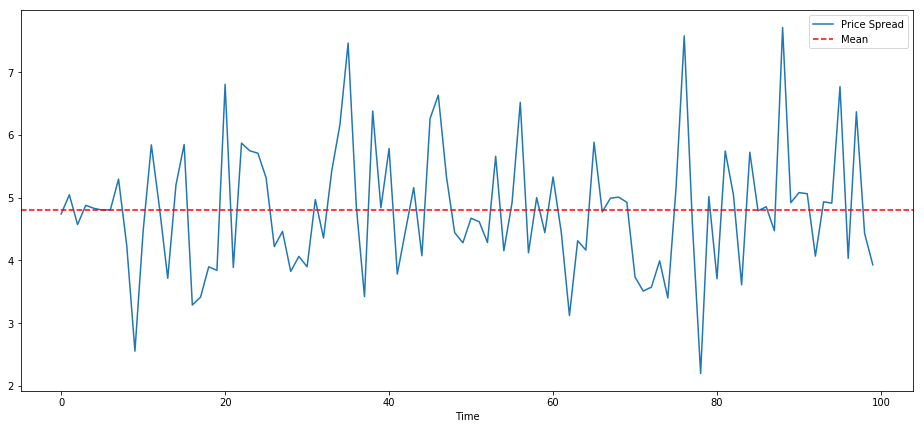

In [95]:
(stock_2 - stock_1).plot(figsize=(16, 7)) # Spread between both series
plt.axhline((stock_2 - stock_1).mean(), color='red', linestyle='--') # Mean spread
plt.xlabel('Time')
plt.legend(['Price Spread', 'Mean'])

## Autocorrelation and Partial Autocorrelation

Autocorrelation is just a measurement of how correlated is a timeseries with itself, accounting for some difference of "lags" ([see more](https://onlinecourses.science.psu.edu/stat501/node/358/)). We'll use a couple of other tools from statsmodels. The first example, and easiest to understand is the ACF (Autocorrelation).

In [112]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [96]:
tb = pd.read_csv(
    'data/tb-sales.csv',
    index_col=0,
    parse_dates=True
)

In [98]:
tb.head()

,Toothbrush Sales
DATE,
2009-01-01,7523.6215
2009-02-01,7551.0275
2009-03-01,7543.5725
2009-04-01,7551.1695
2009-05-01,7562.2810


In [101]:
bookings = pd.read_csv('data/bookings-processed.csv', index_col=0, parse_dates=True)

In [102]:
bookings.head()

,Bookings
Period,
2006-01-01,383
2006-02-01,366
2006-03-01,250
2006-04-01,318
2006-05-01,334


Autocorrelation of Hotel Bookings:

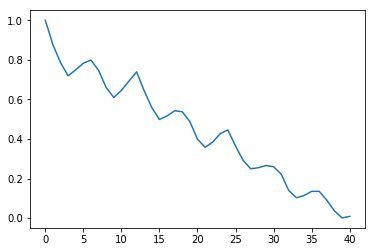

In [108]:
plt.plot(acf(bookings["Bookings"]))

Autocorrelation of Toothbrush Sales:

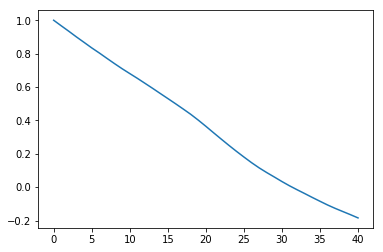

In [110]:
plt.plot(acf(tb["Toothbrush Sales"]))

These autocorrelation plots aren't good because our data is non-stationary. We've learned in our previous lesson how to make it stationary, we'll differentiate both datasets:

In [142]:
tb['First Difference'] = tb.diff()

In [183]:
bookings['First Difference'] = bookings.diff(1)

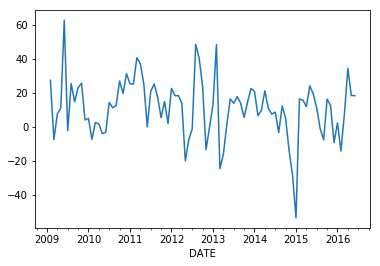

In [184]:
tb['First Difference'].plot()

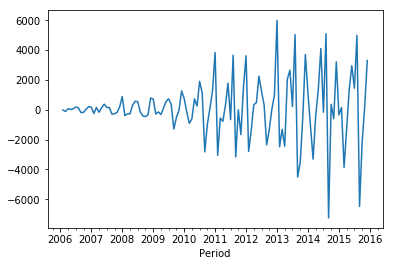

In [185]:
bookings['First Difference'].plot()

And now we can take a look again at our autocorrelation plots:

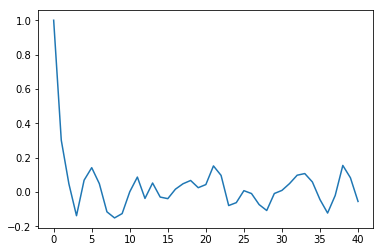

In [148]:
plt.plot(acf(tb["First Difference"].dropna()))

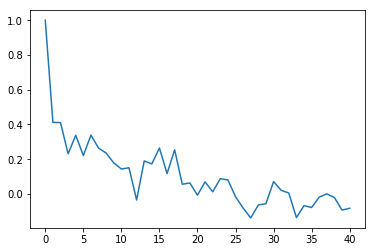

In [149]:
plt.plot(acf(bookings["First Difference"].dropna()))

There are actually a few functions from statsmodels that allows us to build these plots in a much nicer way, let's start with autocorrelation using the `plot_acf` function:

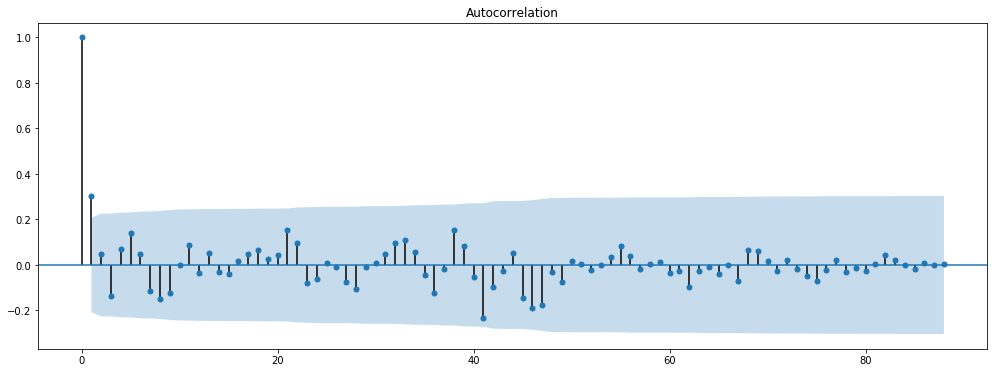

In [172]:
fig, ax = plt.subplots(figsize=(17, 6))
plot_acf(tb["First Difference"].dropna(), ax=ax);